In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
data = pd.read_csv('stock_data.csv')
data = data['Close'].values.reshape(-1, 1)

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)


In [16]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [17]:
sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)


In [18]:
train_size = int(len(data) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [19]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\palla\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0095
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2246e-05
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8752e-05
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5792e-05
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7861e-05
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6523e-05
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7004e-05
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7691e-05
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3551e-05
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8810e-05
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5435e-05
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6982e-05
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4379e-05
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5283e-05
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━

In [21]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')


Training Loss: 0.0000
Testing Loss: 0.0008


In [22]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


In [23]:
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


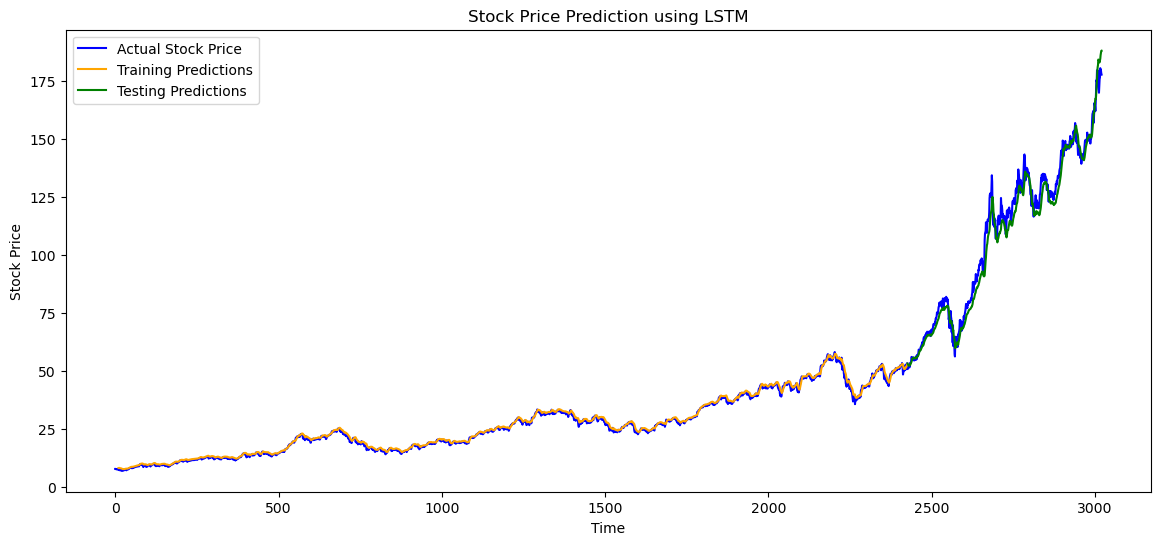

In [24]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(data)), data, label='Actual Stock Price', color='blue')
plt.plot(np.arange(sequence_length, train_size + sequence_length), train_predictions.flatten(), label='Training Predictions', color='orange')
plt.plot(np.arange(train_size + sequence_length, len(data)), test_predictions.flatten(), label='Testing Predictions', color='green')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
